In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:

class NeuralNetwork(object):
    def __init__(self, layers = [2 , 10, 1], activations=['sigmoid', 'sigmoid']):
        assert(len(layers) == len(activations)+1)
        self.layers = layers
        self.activations = activations
        self.weights = []
        self.biases = []
        for i in range(len(layers)-1):
            self.weights.append(np.random.randn(layers[i+1], layers[i]))
            self.biases.append(np.random.randn(layers[i+1], 1))
    
    def feedforward(self, x):
       
        a = np.copy(x)
        z_s = []
        a_s = [a]
        for i in range(len(self.weights)):
            activation_function = self.getActivationFunction(self.activations[i])
            z_s.append(self.weights[i].dot(a) + self.biases[i])
            a = activation_function(z_s[-1])
            a_s.append(a)
        return (z_s, a_s)
    def backpropagation(self,y, z_s, a_s):
        dw = [] 
        db = [] 
        deltas = [None] * len(self.weights)  
        
        deltas[-1] = ((y-a_s[-1])*(self.getDerivitiveActivationFunction(self.activations[-1]))(z_s[-1]))
        #BackPropagation
        for i in reversed(range(len(deltas)-1)):
            deltas[i] = self.weights[i+1].T.dot(deltas[i+1])*(self.getDerivitiveActivationFunction(self.activations[i])(z_s[i]))        
       
        batch_size = y.shape[1]
        db = [d.dot(np.ones((batch_size,1)))/float(batch_size) for d in deltas]
        dw = [d.dot(a_s[i].T)/float(batch_size) for i,d in enumerate(deltas)]
        
        return dw, db
    def train(self, x, y, batch_size=10, epochs=100, lr = 0.01):
    # update weights and biases based on the output
        for e in range(epochs): 
            i=0
            while(i<len(y)):
                x_batch = x[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                i = i+batch_size
                z_s, a_s = self.feedforward(x_batch)
                dw, db = self.backpropagation(y_batch, z_s, a_s)
                self.weights = [w+lr*dweight for w,dweight in  zip(self.weights, dw)]
                self.biases = [w+lr*dbias for w,dbias in  zip(self.biases, db)]
                print("loss = {}".format(np.linalg.norm(a_s[-1]-y_batch) ))
    @staticmethod           
    def getActivationFunction(name):
        if(name == 'sigmoid'):
            return lambda x : np.exp(x)/(1+np.exp(x))
        elif(name == 'linear'):
            return lambda x : x
        elif(name == 'relu'):
            def relu(x):
                y = np.copy(x)
                y[y<0] = 0
                return y
            return relu
        else:
            print('Unknown activation function. linear is used')
            return lambda x: x
    @staticmethod 
    def getDerivitiveActivationFunction(name):
        if(name == 'sigmoid'):
            sig = lambda x : np.exp(x)/(1+np.exp(x))
            return lambda x :sig(x)*(1-sig(x)) 
        elif(name == 'linear'):
            return lambda x: 1
        elif(name == 'relu'):
            def relu_diff(x):
                y = np.copy(x)
                y[y>=0] = 1
                y[y<0] = 0
                return y
            return relu_diff
        else:
            print('Unknown activation function. linear is used')
            return lambda x: 1                

loss = 22.192966841530286
loss = 22.178816674686498
loss = 22.16505544901925
loss = 22.151600182385124
loss = 22.138378935846912
loss = 22.125328714848063
loss = 22.11239381101081
loss = 22.09952448039687
loss = 22.08667588135811
loss = 22.07380721464633
loss = 22.06088102261587
loss = 22.04786261473872
loss = 22.03471959434906
loss = 22.021421467298858
loss = 22.007939317566585
loss = 21.99424553819158
loss = 21.98031360847461
loss = 21.966117910384238
loss = 21.95163357867893
loss = 21.936836380499408
loss = 21.921702621180728
loss = 21.906209073834358
loss = 21.89033293089877
loss = 21.87405177638272
loss = 21.857343577950065
loss = 21.840186698333564
loss = 21.82255992582797
loss = 21.80444252380414
loss = 21.785814299309198
loss = 21.766655690870888
loss = 21.746947875604416
loss = 21.726672895622116
loss = 21.705813803563704
loss = 21.68435482679124
loss = 21.662281549421746
loss = 21.63958111089723
loss = 21.616242419214746
loss = 21.59225637626119
loss = 21.567616111927403
loss

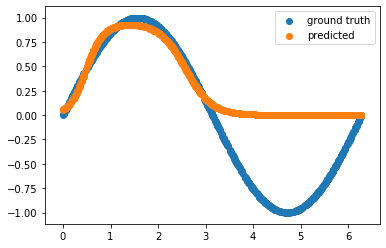

In [3]:
if __name__ == '__main__': 
    nn = NeuralNetwork([1,100,1], activations = ['sigmoid', 'sigmoid'])
    X = 2*np.pi*np.random.rand(1000).reshape(1,-1)
    y = np.sin(X)
    
    nn.train(X,y, epochs = 10000, batch_size = 64, lr = 0.1)
    z_s, a_s = nn.feedforward(X)
    plt.scatter(X.flatten(), y.flatten(), label = 'ground truth')
    plt.scatter(X.flatten(), a_s[-1].flatten(), label = 'predicted')
    plt.legend()
    plt.show()